In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# We will work on Restaurant tips data

In [3]:
tips_data = sns.load_dataset('tips')

# Understanding our data

In [4]:
#let's look at the first few rows
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
#let's look at the last few rows
tips_data.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [6]:
# A general overview of the tips given by the customers
tips_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
# How many weekdays are present in the dataset
tips_data['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

<AxesSubplot:>

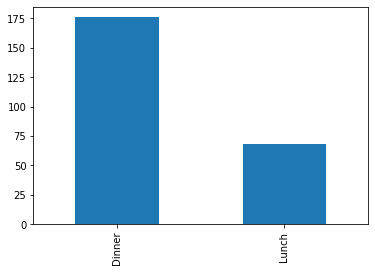

In [8]:
# Number of Lunch meals and Dinner meals
tips_data['time'].value_counts().plot(kind='bar')

# When do people pay more tips?

In [9]:
tips_data.groupby(['time'])['tip'].mean()

# More people pay during Dinner time !

time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64

<AxesSubplot:xlabel='time'>

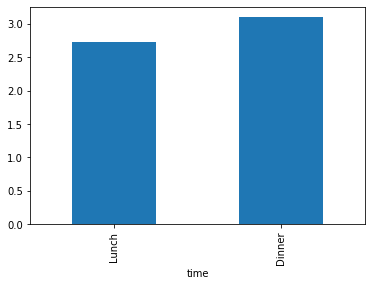

In [10]:
tips_data.groupby(['time'])['tip'].mean().plot(kind='bar')


# Average tips according to:
# 1-Sex 
# 2-Smoker/non-Smoker

In [11]:
# The average of tips based on sex
tips_data.groupby(['sex'])['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

<AxesSubplot:xlabel='sex'>

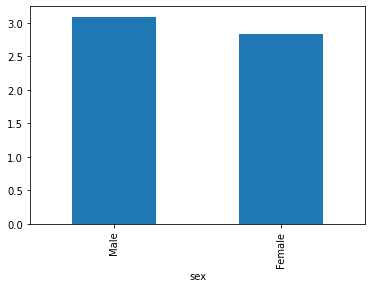

In [12]:
tips_data.groupby(['sex'])['tip'].mean().plot(kind='bar')

In [13]:
# The Aerage of tips based on smoker/non-smoker
tips_data.groupby(['smoker'])['tip'].mean()

smoker
Yes    3.008710
No     2.991854
Name: tip, dtype: float64

<AxesSubplot:xlabel='smoker'>

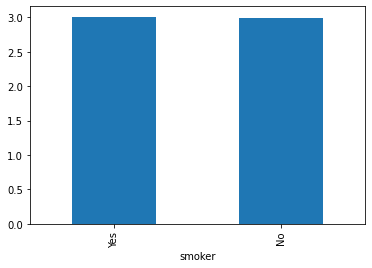

In [14]:
tips_data.groupby(['smoker'])['tip'].mean().plot(kind='bar')

In [15]:
# Mixing the two categories together...
tips_data.groupby(['sex', 'smoker'])['tip'].mean().unstack()

smoker,Yes,No
sex,,
Male,3.051167,3.113402
Female,2.931515,2.773519


# The relationship between total bills and the tips paid

In [16]:
new_column = (tips_data['tip']/tips_data['total_bill'])*100
tips_data['tips as a %']= new_column
tips_data

,total_bill,tip,sex,smoker,day,time,size,tips as a %
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

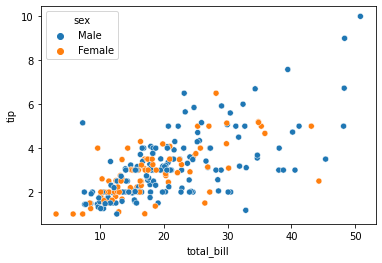

In [30]:
# Let's visualize the relationship between total bills and tips, with regard to sex

sns.scatterplot(x='total_bill', y='tip', data=tips_data, hue='sex')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

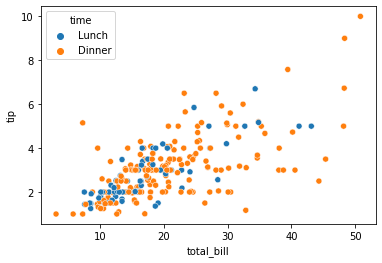

In [31]:
# Let's visualize the relationship between total bills and tips, with regard to time
# We can see that more tips are paid in Dinner meals, as seen earlier using the bar chart

sns.scatterplot(x='total_bill', y='tip', data=tips_data, hue='time')

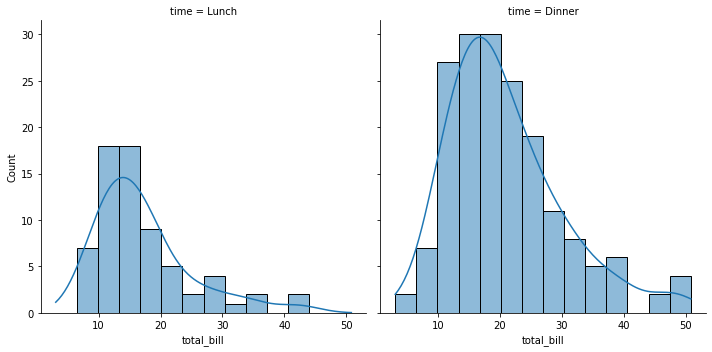

In [39]:
# Let's look at the distribution of total bill according to time
# We can see that people are actually paying more for Dinner

sns.displot(data=tips_data, x='total_bill', col='time',  kde=True)

# Correlation for all numeric variables according to Sex

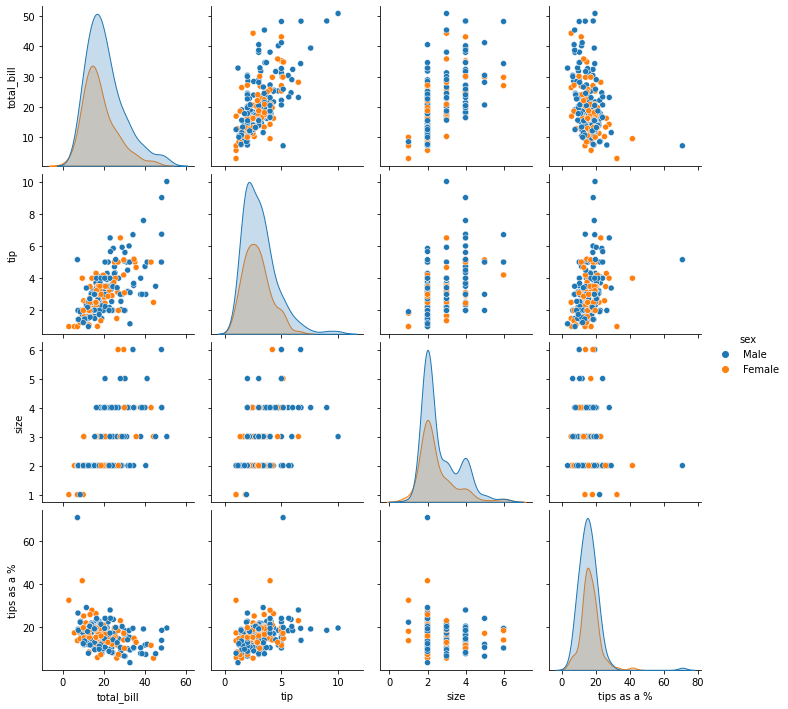

In [41]:
# This really gives us a lot of insights

sns.pairplot(data=tips_data, hue='sex')